### Hello World

In [1]:
# type: print('Hello World!')


In [ ]:
# type: 5 + 3


In [2]:
# type: 5 * 3


In [5]:
# type: 
# x = 10
# y = 7
# find x * y


15

In [3]:
# covert 3 meters to cms


### Junior Convertor 

In [4]:
units = input("Select Weight Units to Convert from. Enter K for kg or L for pounds: ").lower()

wk = 'Your weight in kgs: '
wl = 'Your weight in lbs: '

if units == 'k':
    x1 = float(input(wk))
    wlb = 2.225 * x1
    print('Your weight in pounds is', round(wlb, 2), 'lbs')

elif units == 'l':
    x2 = float(input(wl))
    wkg = x2 / 2.225
    print('Your weight in kgs is', round(wkg, 2), 'kg')

else:
    print('Invalid entry. Please enter K or L.')

Select Weight Units to Convert from. Enter K for kg or L for pounds:  k
Your weight in kgs:  90


Your weight in pounds is 200.25 lbs


In [ ]:
print("Welcome to the Junior Weight Converter!")
print("Type 'stop' or 'quit' at any time to exit.\n")

while True:
    units = input("Select Weight Units to Convert from. Enter K for kg or L for pounds: ").lower()

    if units in ['stop', 'quit']:
        print("Thanks for using the converter. Goodbye!")
        break

    wk = 'Enter your weight in kilograms: '
    wl = 'Enter your weight in pounds: '

    if units == 'k':
        x1_input = input(wk)
        if x1_input.lower() in ['stop', 'quit']:
            print("Thanks for using the converter. Goodbye!")
            break
        try:
            x1 = float(x1_input)
            wlb = 2.225 * x1
            print('Your weight in pounds is', round(wlb, 2), 'lbs\n')
        except ValueError:
            print("Oops! Please enter a valid number for your weight.\n")

    elif units == 'l':
        x2_input = input(wl)
        if x2_input.lower() in ['stop', 'quit']:
            print("Thanks for using the converter. Goodbye!")
            break
        try:
            x2 = float(x2_input)
            wkg = x2 / 2.225
            print('Your weight in kilograms is', round(wkg, 2), 'kg\n')
        except ValueError:
            print("Oops! Please enter a valid number for your weight.\n")

    else:
        print("Invalid entry. Please enter 'K' for kilograms or 'L' for pounds.\n")

## Simple  Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import time

In [2]:
df = pd.read_csv("02_area_price_000.csv")

In [3]:
df # Note that the price is in $000, i.e., a value of 350 means that the house price is $350,000

,area,price
0,1166,589.232
1,1589,771.387
2,602,357.510
3,982,455.796
4,1697,810.714
5,681,328.530
6,1299,567.522
7,1228,563.276
8,845,493.683
9,712,342.061


In [4]:
# Extract x (area) and y (price)
x = df["area"].values
y = df["price"].values

In [5]:
type(x[0]), type(y[0])

(numpy.int64, numpy.float64)

In [6]:
# Construct X matrix with a bias term (column of ones)
X = np.column_stack((np.ones(len(x)), x))
X

array([[1.000e+00, 1.166e+03],
       [1.000e+00, 1.589e+03],
       [1.000e+00, 6.020e+02],
       [1.000e+00, 9.820e+02],
       [1.000e+00, 1.697e+03],
       [1.000e+00, 6.810e+02],
       [1.000e+00, 1.299e+03],
       [1.000e+00, 1.228e+03],
       [1.000e+00, 8.450e+02],
       [1.000e+00, 7.120e+02],
       [1.000e+00, 1.446e+03],
       [1.000e+00, 1.567e+03],
       [1.000e+00, 9.920e+02]])

In [7]:
# Apply normal equation: β = (Xᵀ·X)⁻¹·Xᵀ·y
XT_X = X.T.dot(X)
XT_y = X.T.dot(y)
beta = np.linalg.inv(XT_X).dot(XT_y)

In [8]:
# Results
B0, B1 = beta
print(f"B0 (Intercept): {B0:.2f}")
print(f"B1 (Slope): {B1:.2f}")

B0 (Intercept): 77.07
B1 (Slope): 0.41


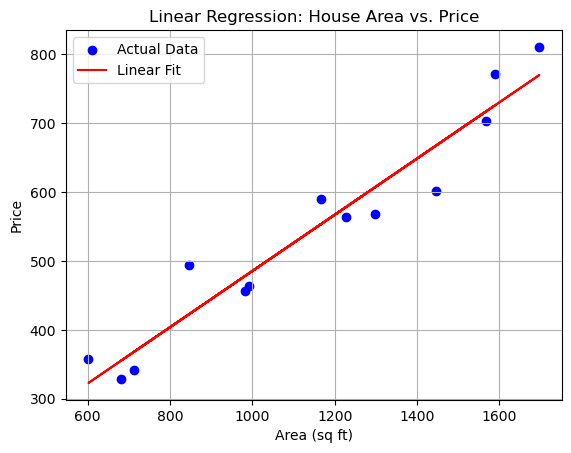

In [9]:
# Predict prices using the linear model
y_pred = B0 + B1 * x

# Plot actual vs. predicted
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Linear Fit')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Linear Regression: House Area vs. Price")
plt.legend()
plt.grid(True)
plt.show()

## Price is Right Game!

In [10]:
# Tracking data
areas = []
predicted_prices = []
guesses = []
errors = []
squared_errors = []

# Game duration
t_minutes = 3 # set minutes
duration = 60  * t_minutes
start_time = time.time()

# Valid exit phrases
stop_commands = ["exit", "stop", "quit", "^c"]

print(f"🎮 Price is Right Regression Challenge\nYou have {t_minutes} minutes to guess house prices based on area. Let's go!")

while time.time() - start_time < duration:
    # Generate house area in range [400, 2500]
    area = np.random.randint(400, 2500)
    predicted_price = B0 + B1 * area
    print(f"\n🏠 House Area: {area} sq ft")

    guess_input = input("💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit): ")

    if guess_input.lower() in stop_commands:
        print("🛑 Game stopped by user.")
        break

    try:
        guess = float(guess_input)
        error = guess - predicted_price
        se = error**2

        areas.append(area)
        predicted_prices.append(predicted_price)
        guesses.append(guess)
        errors.append(error)
        squared_errors.append(se)

        remaining_time = int(duration - (time.time() - start_time))
        print(f"📊 Predicted: ${1000*predicted_price:.2f} | Your Guess: ${1000*guess:.2f} | Error: ${1000*error:.2f} | ⏱️ Remaining Time: {remaining_time} seconds")

    except ValueError:
        print("❌ Invalid input. Please enter a number or a valid stop command.")

print("\n⏰ Time's up! Execute the Next Cells to Know your Score \n and See how you did:")


🎮 Price is Right Regression Challenge
You have 3 minutes to guess house prices based on area. Let's go!

🏠 House Area: 1112 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  550


📊 Predicted: $531070.05 | Your Guess: $550000.00 | Error: $18929.95 | ⏱️ Remaining Time: 170 seconds

🏠 House Area: 1363 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  610.53


📊 Predicted: $633545.67 | Your Guess: $610530.00 | Error: $-23015.67 | ⏱️ Remaining Time: 148 seconds

🏠 House Area: 1313 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  625


📊 Predicted: $613132.20 | Your Guess: $625000.00 | Error: $11867.80 | ⏱️ Remaining Time: 118 seconds

🏠 House Area: 1823 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  900


📊 Predicted: $821349.59 | Your Guess: $900000.00 | Error: $78650.41 | ⏱️ Remaining Time: 107 seconds

🏠 House Area: 507 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  260


📊 Predicted: $284067.07 | Your Guess: $260000.00 | Error: $-24067.07 | ⏱️ Remaining Time: 92 seconds

🏠 House Area: 701 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  340


📊 Predicted: $363271.33 | Your Guess: $340000.00 | Error: $-23271.33 | ⏱️ Remaining Time: 75 seconds

🏠 House Area: 1594 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  750


📊 Predicted: $727855.90 | Your Guess: $750000.00 | Error: $22144.10 | ⏱️ Remaining Time: 67 seconds

🏠 House Area: 1013 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  550


📊 Predicted: $490651.38 | Your Guess: $550000.00 | Error: $59348.62 | ⏱️ Remaining Time: 62 seconds

🏠 House Area: 1951 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  850


📊 Predicted: $873608.08 | Your Guess: $850000.00 | Error: $-23608.08 | ⏱️ Remaining Time: 57 seconds

🏠 House Area: 502 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  250


📊 Predicted: $282025.72 | Your Guess: $250000.00 | Error: $-32025.72 | ⏱️ Remaining Time: 54 seconds

🏠 House Area: 1330 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  665


📊 Predicted: $620072.78 | Your Guess: $665000.00 | Error: $44927.22 | ⏱️ Remaining Time: 49 seconds

🏠 House Area: 2280 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  1140


📊 Predicted: $1007928.71 | Your Guess: $1140000.00 | Error: $132071.29 | ⏱️ Remaining Time: 44 seconds

🏠 House Area: 2067 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  1030


📊 Predicted: $920967.33 | Your Guess: $1030000.00 | Error: $109032.67 | ⏱️ Remaining Time: 35 seconds

🏠 House Area: 1719 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  850


📊 Predicted: $778889.58 | Your Guess: $850000.00 | Error: $71110.42 | ⏱️ Remaining Time: 27 seconds

🏠 House Area: 1478 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  745


📊 Predicted: $680496.65 | Your Guess: $745000.00 | Error: $64503.35 | ⏱️ Remaining Time: 19 seconds

🏠 House Area: 1259 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  625


📊 Predicted: $591085.66 | Your Guess: $625000.00 | Error: $33914.34 | ⏱️ Remaining Time: 12 seconds

🏠 House Area: 641 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  320


📊 Predicted: $338775.17 | Your Guess: $320000.00 | Error: $-18775.17 | ⏱️ Remaining Time: 5 seconds

🏠 House Area: 2082 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  1040


📊 Predicted: $927091.37 | Your Guess: $1040000.00 | Error: $112908.63 | ⏱️ Remaining Time: 1 seconds

🏠 House Area: 1664 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  840


📊 Predicted: $756434.76 | Your Guess: $840000.00 | Error: $83565.24 | ⏱️ Remaining Time: -2 seconds

⏰ Time's up! Here's how you did:


In [20]:
# Summary table
results = pd.DataFrame({
    "Round": range(1, len(guesses) + 1),
    "Area (sq ft)": areas,
    "Your Guess ($)": guesses,
    "Model Prediction ($)": predicted_prices,
    "Error ($)": errors,
    "Squared Error": squared_errors
})

# Metrics
SSR = sum(squared_errors)
MSE = SSR / len(squared_errors) if squared_errors else 0
mean_prediction = np.mean(predicted_prices)
SST = sum((pred - mean_prediction)**2 for pred in predicted_prices)
R2 = 1 - SSR / SST if SST != 0 else 0

score = round(1000 * R2 * np.log1p(len(guesses)), 2)


# Summary row
summary = pd.DataFrame({
    "🧾 Summary of": [f"{len(areas)} rounds"],
    "Area (sq ft)": [f"Avg: {np.mean(areas):.2f}"],
    "Your Guess ($)": [f"Avg: {np.mean(guesses):.2f}"],
    "Model Prediction ($)": [f"Avg: {mean_prediction:.2f}"],
    "Error ($)": [f"Total SSR: {SSR:.2f}"],
    "Squared Error | Accuracy": [f"MSE: {MSE:.2f} | R²: {R2:.4f}"],
    "Score": [f"🏆 Score: {score}"]
})

display(results)
summary

,Round,Area (sq ft),Your Guess ($),Model Prediction ($),Error ($),Squared Error
0,1,1112,550.00,531.070055,18.929945,358.342825
1,2,1363,610.53,633.545672,-23.015672,529.721180
2,3,1313,625.00,613.132203,11.867797,140.844610
3,4,1823,900.00,821.349593,78.650407,6185.886472
4,5,507,260.00,284.067072,-24.067072,579.223953
5,6,701,340.00,363.271334,-23.271334,541.554997
6,7,1594,750.00,727.855902,22.144098,490.361063
7,8,1013,550.00,490.651385,59.348615,3522.258117
8,9,1951,850.00,873.608076,-23.608076,557.341235
9,10,502,250.00,282.025725,-32.025725,1025.647061


,🧾 Summary of,Area (sq ft),Your Guess ($),Model Prediction ($),Error ($),Squared Error | Accuracy,Score
0,19 rounds,Avg: 1389.42,Avg: 681.08,Avg: 644.33,Total SSR: 75732.16,MSE: 3985.90 | R²: 0.9145,🏆 Score: 2739.64


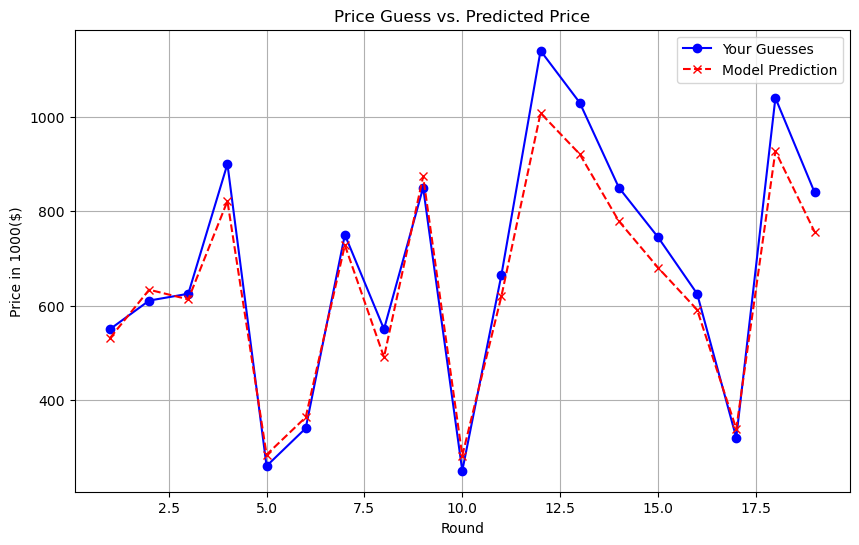

In [17]:
# Plot guesses vs. prediction
plt.figure(figsize=(10,6))
plt.plot(results["Round"], results["Your Guess ($)"], marker='o', label='Your Guesses', color='blue')
plt.plot(results["Round"], results["Model Prediction ($)"], marker='x', linestyle='--', label='Model Prediction', color='red')
plt.xlabel("Round")
plt.ylabel("Price in 1000($)")
plt.title("Price Guess vs. Predicted Price")
plt.legend()
plt.grid(True)
plt.show()